# Importations

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# Utils

In [10]:
def plot_function(f):
    precision = 100000
    x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
    y_axis = f(x_axis)
    plt.figure(figsize=(20, 10))
    plt.xlim(-2, 3)
    plt.ylim(-5, 20)
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.show()

# Function

In [11]:
def f(x):
    y = (np.sin(10 * np.pi * x) / (2 * x)) + (x - 1)**4
    return y

In [12]:
def df(x):
    y = (10*np.pi*np.cos(10*np.pi*x) / 2*x) + (np.sin(10 * np.pi * x) * (0.5 * (-1/x**2))) + 4*x**3
    return y

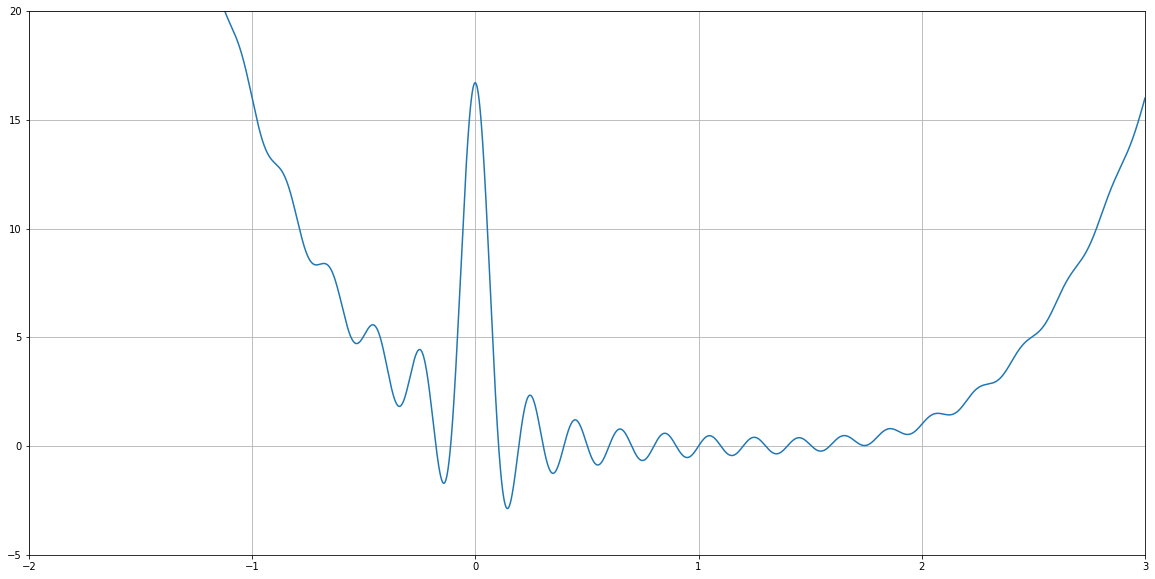

In [13]:
plot_function(f)

# Gradient Descent

Initialization : 2.1812746146468256
Time spend : 399.0905284881592 ms
Final value : 0.5711805738340546 -0.654816954976495


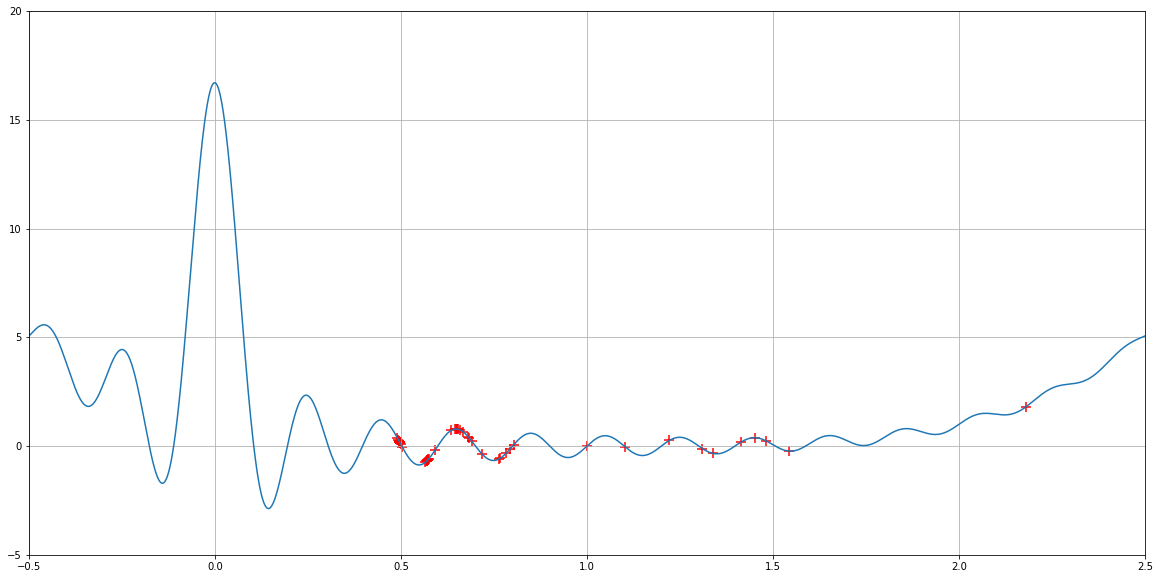

In [14]:
# Learning parameters
nb_epochs = 100000
learning_rate = 0.01

# Initialization
x0 = np.random.uniform(-0.5, 2.5)
x_list = [x0]
print('Initialization :', x0)

# Gradient descent
start = time.time()
for i in range(nb_epochs):
    dx = df(x0)
    x0 = x0 - learning_rate * dx
    x_list.append(x0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print('Final value :', x0, f(x0))

# Display result
x_list = np.array(x_list)
precision = 100000
x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
y_axis = f(x_axis)
plt.figure(figsize=(20, 10))
plt.xlim(-0.5, 2.5)
plt.ylim(-5, 20)
plt.grid()
plt.plot(x_axis, y_axis)
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
plt.show()

# The CMA Evolution Strategy

In [401]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
import scipy.linalg

In [78]:
X = np.linspace(-5, 5, 100)     
Y = np.linspace(-5, 5, 100)     
X, Y = np.meshgrid(X, Y)
X = np.

Z = f(X, Y)
fig = plt.figure(figsize=(15, 10)) 
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.nipy_spectral, linewidth=0.08, antialiased=True)
plt.show()

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]] [[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]


TypeError: f() takes 1 positional argument but 2 were given

In [206]:
def f(X):
    Z = (X[:,0]**2 - 10 * np.cos(2 * np.pi * X[:,0])) + (X[:,1]**2 - 10 * np.cos(2 * np.pi * X[:,1])) + 20
    return Z

In [425]:
print(f(np.array([[-9.94958639e-010,-3.85334713e-10]])))

[0.]


In [426]:
nb_gen = 1000
d = 2

In [427]:
#lamb = 4 +int(3 * np.log(d))
lamb = 50
#mu = int(lamb / 2)
mu = 10
mu_eff = mu

print(lamb, mu)

50 10


In [428]:
c_m = 1.
c_mu = 2 * (mu_eff - 2 + 1 / mu_eff) / ((d + 2)**2 + 2 * mu_eff / 2)
c_c = (4 + mu_eff / d) / (d + 4 + 2 * mu_eff / d)
c_1 = 2 / ((d + 1.3)**2 + mu_eff)
c_sig = (mu_eff + 2) / (d + mu_eff + 5)
d_sig = 1 + 2 * max(0, np.sqrt((mu_eff - 1) / (d + 1)) - 1) + c_sig

print(c_m, c_mu, c_c, c_1, c_sig, d_sig)

1.0 0.6230769230769231 0.5625 0.09573958831977022 0.7058823529411765 3.169983968078931


In [431]:
# Initialize distribution parameter : m, C, sigma
C = np.identity(d) * 100
p_c = np.zeros((d, 1))
p_sig = np.zeros((d, 1))

m = np.zeros((1, d)) + 50
sigma = 0.5

In [432]:
# for generation g = 0, 1, 2, ...
for g in range(nb_gen):
    # sample lambda independent points from (m + sigma * N(0, C))
    x = m + sigma * np.random.multivariate_normal([0] * d, C, lamb)
    
    # evaluate the sample x = (x1, ... xlamb) on f
    fitness_scores = f(x)
    fitness_scores = fitness_scores.reshape((fitness_scores.shape[0], 1))
    
    # update parameters
    tmp = np.concatenate((fitness_scores, x), axis=1)
    tmp = tmp[tmp[:,0].argsort()] # sort all rows according to values in the first column
    tmp = tmp[:mu] # select mu first points of the sorted array
    selected_points = tmp[:, 1:3] # only select columns corresponding to point coordinates
    
    ## update the mean
    m_prev = m
    m_mu = (1 / mu) * np.sum(selected_points, axis=0)
    m = (1 - c_m) * m + c_m * (m_mu)
    print('m :', m)
    
    ## update the covariance matrix
  
    ### rank-mu-update
    C_mu = (1 / mu) * np.dot((selected_points - m_prev).T, selected_points - m_prev)
  
    ### rank-one-update
    #p_c = (1 - c_c) * p_c + c_c * ((1 / sigma) * (m - m_prev))
    p_c = (1 - c_c) * p_c + np.sqrt(c_c * (2 - c_c) * mu_eff) * ((1 / sigma) * (m - m_prev))
    C_c = (1 / mu) * np.dot(p_c, p_c.T)
  
    ### covariance matrix adaptation (rank-mu-update + rank-one-update)
    C_prev = C
    C = (1 - c_mu - c_1) * C + c_mu * C_mu + c_1 * C_c
    print('C :', C)
    
    ## update the step-size
    #p_sig = (1 - c_sig) * p_sig + c_sig * np.dot(np.linalg.inv(np.sqrt(C_prev)), (1 / sigma) * (m - m_prev).T)
    p_sig = (1 - c_sig) * p_sig + np.sqrt(c_sig * (2 - c_sig) * mu_eff) * np.dot(scipy.linalg.sqrtm(scipy.linalg.inv(C_prev)), (1 / sigma) * (m - m_prev).T)
    sigma = sigma * np.exp((c_sig / d_sig) * ((np.linalg.norm(p_sig) / np.sqrt(d)) - 1))
    print('sigma :', sigma)

m : [[45.2721473  44.21027106]]
C : [[65.55561408 30.64679303]
 [30.64679303 71.93625988]]
sigma : 0.8151600877150349
m : [[36.65876976 36.7212057 ]]
C : [[107.61644424  80.24994536]
 [ 80.24994536 103.84203031]]
sigma : 1.5733549482583535
m : [[11.06711043 13.3422993 ]]
C : [[531.0074868  465.23662646]
 [465.23662646 504.83672405]]
sigma : 3.5284834155258005
m : [[-0.50104061 -0.43066785]]
C : [[483.91051072 287.33990273]
 [287.33990273 528.91149585]]
sigma : 4.125664420147717
m : [[ 7.71642251 -0.81773685]]
C : [[611.9181428  176.16514803]
 [176.16514803 584.18372504]]
sigma : 3.6519914809618723
m : [[ 1.42487425 -3.077784  ]]
C : [[589.33025929 -47.33178913]
 [-47.33178913 388.29898121]]
sigma : 3.085413808548867
m : [[-3.47546591 -6.75055009]]
C : [[754.4250721   81.52104348]
 [ 81.52104348 388.64518138]]
sigma : 2.6236063334570523
m : [[-2.2305507 -0.9885428]]
C : [[367.48398619  20.60260696]
 [ 20.60260696 321.77126677]]
sigma : 2.1888523346355164
m : [[ 2.91663169 -2.17797392]]


C : [[1.79832305e-44 1.79123555e-44]
 [1.79123555e-44 1.80232736e-44]]
sigma : 1.5445091428750664
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[3.03057822e-44 3.06108422e-44]
 [3.06108422e-44 3.11079849e-44]]
sigma : 1.4731879822746905
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[3.33459858e-44 3.36739374e-44]
 [3.36739374e-44 3.41974290e-44]]
sigma : 1.4823525472273509
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[5.49580974e-44 5.57091100e-44]
 [5.57091100e-44 5.66449364e-44]]
sigma : 1.2894285824352778
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[6.85691393e-44 6.99952242e-44]
 [6.99952242e-44 7.15709759e-44]]
sigma : 1.1936328570611172
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[7.77550128e-44 7.98469918e-44]
 [7.98469918e-44 8.22110875e-44]]
sigma : 1.052615834073702
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[4.16718085e-44 4.17441837e-44]
 [4.17441837e-44 4.21690718e-44]]
sigma : 1.3254971451397646
m : [[-7.89864011e-11 -3.63689160e-11]]
C : [[7.08224002e-44 6.81762031e-44

sigma : 0.9313950136793419
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.46299381e-46 1.52827795e-46]
 [1.52827795e-46 1.59660463e-46]]
sigma : 0.8581720827000452
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.12240506e-46 2.21810408e-46]
 [2.21810408e-46 2.31835260e-46]]
sigma : 0.9069693109181154
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.47682575e-46 1.54266570e-46]
 [1.54266570e-46 1.61172617e-46]]
sigma : 0.9570568540822544
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.52386647e-46 1.58970156e-46]
 [1.58970156e-46 1.65858120e-46]]
sigma : 0.8843229123904947
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[8.28754026e-47 8.62665929e-47]
 [8.62665929e-47 8.98198558e-47]]
sigma : 0.9049401632482136
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[4.72531355e-47 4.92003841e-47]
 [4.92003841e-47 5.12413463e-47]]
sigma : 0.8269146549444871
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.79602811e-47 2.89719814e-47]
 [2.89719814e-47 3.00357671e-47]]
sigma : 0.8355546853713213
m : [[-

sigma : 0.5778438886932482
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.04188459e-46 2.14222091e-46]
 [2.14222091e-46 2.25048176e-46]]
sigma : 0.575360677282997
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.08151873e-46 1.13498588e-46]
 [1.13498588e-46 1.19270143e-46]]
sigma : 0.53566921201951
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[5.55049264e-47 5.84436213e-47]
 [5.84436213e-47 6.16352149e-47]]
sigma : 0.49524436422268275
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.55497690e-47 2.69376439e-47]
 [2.69376439e-47 2.84443858e-47]]
sigma : 0.452085871417044
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.08799987e-47 1.14169833e-47]
 [1.14169833e-47 1.20006490e-47]]
sigma : 0.46619417942584923
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[5.97815659e-48 6.19209757e-48]
 [6.19209757e-48 6.42317433e-48]]
sigma : 0.45870203061021136
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.25162969e-48 2.32994375e-48]
 [2.32994375e-48 2.41538416e-48]]
sigma : 0.42834949660300825
m : [[-

m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.02973801e-47 1.03390917e-47]
 [1.03390917e-47 1.03811739e-47]]
sigma : 0.5786520108356586
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[6.43462664e-48 6.45483809e-48]
 [6.45483809e-48 6.47521095e-48]]
sigma : 0.8802018506526206
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[6.94617543e-48 6.96782498e-48]
 [6.96782498e-48 6.98960319e-48]]
sigma : 1.5059878889114864
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[8.24300214e-48 8.27349725e-48]
 [8.27349725e-48 8.30424971e-48]]
sigma : 2.0153606030982045
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[3.89070986e-47 3.90690926e-47]
 [3.90690926e-47 3.92324001e-47]]
sigma : 2.6770510534910055
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.21024523e-46 2.21255992e-46]
 [2.21255992e-46 2.21490961e-46]]
sigma : 2.905666490525085
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.92125432e-45 1.92490152e-45]
 [1.92490152e-45 1.92856751e-45]]
sigma : 2.495997802096737
m : [[-7.89864211e-11 -3.63689356e-1

C : [[2.42671204e-42 2.42699522e-42]
 [2.42699522e-42 2.42727861e-42]]
sigma : 1.615787057820892
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[6.89622672e-42 6.89660276e-42]
 [6.89660276e-42 6.89697923e-42]]
sigma : 1.417150167844067
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[1.72140843e-41 1.72136324e-41]
 [1.72136324e-41 1.72131810e-41]]
sigma : 1.7471972570092482
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[3.48754303e-41 3.48757903e-41]
 [3.48757903e-41 3.48761513e-41]]
sigma : 1.7416526061400504
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[7.56444184e-41 7.56459734e-41]
 [7.56459734e-41 7.56475310e-41]]
sigma : 1.7802769469801243
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[2.70187774e-40 2.70187722e-40]
 [2.70187722e-40 2.70187674e-40]]
sigma : 1.8991775774943875
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[3.98463858e-40 3.98444597e-40]
 [3.98444597e-40 3.98425353e-40]]
sigma : 1.720320105011457
m : [[-7.89864211e-11 -3.63689356e-11]]
C : [[7.48169257e-40 7.48184935e-40]


m : [[-7.89190439e-11 -3.63015455e-11]]
C : [[1.76647811e-26 1.76660035e-26]
 [1.76660035e-26 1.76672260e-26]]
sigma : 0.8520895913013357
m : [[-7.88930592e-11 -3.62755568e-11]]
C : [[1.97886499e-26 1.97899102e-26]
 [1.97899102e-26 1.97911705e-26]]
sigma : 0.9086102389620541
m : [[-7.88063551e-11 -3.61888484e-11]]
C : [[1.45109117e-26 1.45116653e-26]
 [1.45116653e-26 1.45124190e-26]]
sigma : 1.0379963483244672
m : [[-7.88833308e-11 -3.62658304e-11]]
C : [[1.20806125e-26 1.20813057e-26]
 [1.20813057e-26 1.20819989e-26]]
sigma : 1.1336297615812343
m : [[-7.88646375e-11 -3.62471362e-11]]
C : [[1.00742179e-26 1.00747180e-26]
 [1.00747180e-26 1.00752181e-26]]
sigma : 0.9856171655020786
m : [[-7.88689093e-11 -3.62514090e-11]]
C : [[1.03737813e-26 1.03744279e-26]
 [1.03744279e-26 1.03750745e-26]]
sigma : 0.8715111098739474
m : [[-7.88438491e-11 -3.62263466e-11]]
C : [[8.15562473e-27 8.15618758e-27]
 [8.15618758e-27 8.15675048e-27]]
sigma : 0.8051723936692153
m : [[-7.88578455e-11 -3.62403443e

sigma : 0.379840828982878
m : [[-1.79312075e-09 -5.27291889e-10]]
C : [[1.30135778e-28 2.02220683e-29]
 [2.02220683e-29 8.98642123e-29]]
sigma : 0.3666716435110359
m : [[-1.79312356e-09 -5.27290682e-10]]
C : [[5.49641819e-29 1.10871879e-29]
 [1.10871879e-29 3.65301180e-29]]
sigma : 0.43895368780402944
m : [[-1.79312445e-09 -5.27290824e-10]]
C : [[2.54506372e-29 7.74436511e-30]
 [7.74436511e-30 1.63143002e-29]]
sigma : 0.44725492508901493
m : [[-1.79312456e-09 -5.27291070e-10]]
C : [[1.17358018e-29 4.22549468e-30]
 [4.22549468e-30 6.68917106e-30]]
sigma : 0.3946918262460779
m : [[-1.79312477e-09 -5.27291300e-10]]
C : [[5.25079268e-30 1.91523755e-30]
 [1.91523755e-30 2.71598731e-30]]
sigma : 0.36246675890641106
m : [[-1.79312523e-09 -5.27291452e-10]]
C : [[2.12125741e-30 1.02741611e-30]
 [1.02741611e-30 1.25037868e-30]]
sigma : 0.38797204125990775
m : [[-1.79312496e-09 -5.27291432e-10]]
C : [[6.90072453e-31 3.23853174e-31]
 [3.23853174e-31 4.46952308e-31]]
sigma : 0.3842420219870028
m : 

## 0) Randomized Black Box Optimization

We consider black box search scenario, where we want to minimize an objective function

$$ f : R^n \to R \\ x \mapsto f(x) $$

The **objective** is to find one or more search points (candidate solutions), $x \in R^n$, with a function value, $f(x)$, as small as possible. Black box optimization refers to the situation where function values of evaluated search points are the only accessible information on $f$. The search points to be evaluated can be freely chosen. We define the **search costs** as the number of executed function evaluations.

Randomized black box search :
- Initialize distribution parameter $\theta^{(0)}$
- For generation g = 0, 1, 2, ...
    - Sample $\lambda$ independent points from distribution $P(x | \theta^{(g)}) \to x_1, ... x_\lambda$
    - Evaluate the sample $x_1$, ... $x_\lambda$ on $f$
    - Update parameters $\theta^{(g+1)} = F_\theta (\theta^{(g)}, (x_1, f(x_1)), ... (x_\lambda, f(x_\lambda)))$
    - Break, if termination criterion met

In the CMA Evolution Strategy, the search distribution P is a multivariate normal distribution.

Randomized search algorithms are regarded to be robust in a rugged search landscape, which can comprise discontinuities, (sharp) ridges, or local optima. The covariance matrix adaptation (CMA) in particular is designed to tackle, additionally, ill-conditioned and non-separable problems.

## 1) Basic Equation : Sampling

In the CMA Evolution Strategy, a population of new search points (individuals, offspring) is generated by sampling a multivariate normal distribution. The basic equation for sampling the search points, for generation number g= 0, 1, 2, ... is

$$ x_k^{(g+1)} \sim m^{(g)} + \sigma^{(g)} N(0, C^{(g)}) = N(m^{(g)}, (\sigma^{(g)})^2 C^{(g)})$$

How to calculate $m^{(g+1)}$, $C^{(g+1)}$, and $\sigma^{(g+1)}$ for the next generation g + 1. The next three sections will answer these questions, respectively.

## 2) Selection and Recombination : Moving the Mean

The new mean is the weighted average of $\mu$ best points from the sample.

The measure $\mu_{eff}$ is the variance effective selection mass :

$$\mu_{eff} = \frac{1}{\sum_{i=1}^\mu w_i^2}$$

We can observe that $1 \leq \mu_{eff} \leq \mu$ (usually $\mu_{eff} = \lambda / 4$).

**Final equation :**

$$ m^{(g+1)} =  c_m \sum_{i=1}^\mu w_i x^{(g+1)}_{i:\lambda} + (1 - c_m) m^{(g)} $$

$c_m \leq 1$ is the learning rate, usually set to 1. Hence $ m^{(g+1)} = \sum_{i=1}^\mu w_i x^{(g+1)}_{i:\lambda}$. Choosing $c_m \leq 1$ can be advantageous on noisy functions.

## 3) Adapting the Covariance Matrix

### a) Estimating the Convariance Matrix From Scratch

We assume that the population contains enough information to reliably estimate a covariance matrix from it. We also assume that $\sigma^{(g)} = 1$ (true except for a constant factor).

We can estimate the original covariance matrix $C^{(g)}$ using the sampled population via the empirical covariance matrix, which is an unbiased estimator of $C^{(g)}$ :

$$ C^{(g+1)}_{emp} = \frac{1}{\lambda - 1} \sum_{i=1}^\lambda (x_i^{(g+1)} - \frac{1}{\lambda} \sum_{j=1}^\lambda x_j^{(g+1)}) (x_i^{(g+1)} - \frac{1}{\lambda} \sum_{j=1}^\lambda x_j^{(g+1)})^T $$

There exists a slightly different approach to estimate $C^{(g)}$ :

$$ C^{(g+1)}_{\lambda} = \frac{1}{\lambda} \sum_{i=1}^\lambda (x_i^{(g+1)} - m^{(g)}) (x_i^{(g+1)} - m^{(g)})^T $$

To estimate a "better" covariance matrix, we can use :

$$ C^{(g+1)}_{\mu} = \sum_{i=1}^\mu w_i (x_{i:\lambda}^{(g+1)} - m^{(g)}) (x_{i:\lambda}^{(g+1)} - m^{(g)})^T $$

The matrix $C_\mu^{(g+1)}$ is an estimator for the distribution of selected steps. Sampling from it tends to reproduce selected, i.e. successful steps, giving a justification for what a "better" covariance matrix means.

For these equations to be reliable estimators, we need $\mu_{eff} = 10n$. The next step is to avoid this restriction on $\mu_{eff}$.

### b) Rank-$\mu$-Update

To achieve fast search, the population size $\lambda$ must be small. Because $\mu_{eff} = \lambda / 4$ also $\mu_{eff}$ must be small and then it is not possible to get a reliable estimator for a good covariance matrix. As a remedy, information from previous generations is used additionally.

To do that, we calculate an exponentially weighted moving average over sampled generations :

$$ C^{(g+1)} = (1 - c_\mu) C^{(g)} + c_\mu \frac{1}{\sigma^{(g)^2}} C_\mu^{(g+1)} = (1 - c_\mu) C^{(g)} + c_\mu \sum_{i=1}^\mu w_i y^{(g+1)}_{i:\lambda} (y^{(g+1)}_{i:\lambda})^T $$

A first order approximation for a good choice is $c_\mu = \mu_{eff} / n^2 $.

### c) Rank-One-Update

In the first section, we started by estimating the complete covariance matrix from scratch, using all selected steps from a single generation. We now take an opposite viewpoint. We repeatedly update the covariance matrix in the generation sequence using a single  selected step only.


Using previous equations, we have :

$$ C^{(g+1)} = (1 - c_1) C^{(g)} + c_1 y^{(g+1)} (y^{(g+1)})^T $$

But the problem is that the sign information is lost when calculating $C^{(g+1)}$. To reintroduce it, a so-called evolution path is constructed. An evolution path is a sequence of successive steps, this summation is referred to as a cumulation. It looks like $ \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}} + \frac{m^{(g)} - m^{(g-1)}}{\sigma^{(g-1)}} + \frac{m^{(g-1)} - m^{(g-2)}}{\sigma^{(g-2)}} $, but in practice we use an exponentially weighted moving average :

$$ p_c^{(g+1)} = (1 - c_c) p_c^{(g)} + c_c \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}} $$

The rank-one-update is then :

$$ C^{(g+1)} = (1 - c_1) C^{(g)} + c_1 p_c^{(g+1)} (p_c^{(g+1)})^T $$

$c_1 = 2 / n^2$

### d) Combining rank-$\mu$-update and cumulation

**Final equation :**

$$ C^{(g+1)} = (1 - c_1 - c_\mu \sum_j w_j) C^{(g)} + c_1 p_c^{(g+1)} (p_c^{(g+1)})^T + c_\mu \sum_{i=1}^\mu w_i y^{(g+1)}_{i:\lambda} (y^{(g+1)}_{i:\lambda})^T $$

If $c_1 = 0$, it is rank-$\mu$-update. If $c_\mu = 0$, it is rank-one-update.

The equation combines the advantages of rank-$\mu$-update and rank-one-update. On the one hand, the information from the entire population is used efficiently by the so-called rank-$\mu$-update. On the other hand, information of correlations between generations is exploited by using the evolution path for the rank-one-update. The former is important in large populations, the latter is particularly important in small populations.

## 4) Step-size control

$$ p_\sigma^{(g+1)} = (1 - c_\sigma) p_\sigma^{(g)} + c_\sigma C^{(g)^{-\frac{1}{2}}}\frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}} $$

**Final equation :**

$$ \sigma^{(g+1)} = \sigma^{(g)} exp( \frac{c_\sigma}{d_\sigma} (\frac{||p_\sigma^{(g+1)}||}{E || N(0, I) ||} - 1) ) $$

## CMA-ES algorithm summary :

$$ m^{(g+1)} =  c_m \sum_{i=1}^\mu w_i x^{(g+1)}_{i:\lambda} + (1 - c_m) m^{(g)} $$

$$ C^{(g+1)} = (1 - c_1 - c_\mu \sum_j w_j) C^{(g)} + c_1 p_c^{(g+1)} (p_c^{(g+1)})^T + c_\mu \sum_{i=1}^\mu w_i y^{(g+1)}_{i:\lambda} (y^{(g+1)}_{i:\lambda})^T $$

$$ \sigma^{(g+1)} = \sigma^{(g)} exp( \frac{c_\sigma}{d_\sigma} (\frac{||p_\sigma^{(g+1)}||}{E || N(0, I) ||} - 1) ) $$

aside :

$$ y_{i:\lambda}^{(g+1)} = (x_{i:\lambda}^{(g+1)} - m^{(g)}) / \sigma^{(g)} $$

$$ p_c^{(g+1)} = (1 - c_c) p_c^{(g)} + c_c \frac{m^{(g+1)} - m^{(g)}}{\sigma^{(g)}} $$

$$ p_\sigma^{(g+1)} =  $$

In [42]:
# CMA-ES algorithm

# Initialize parameters
m = 0
sigma = 1
lamb = 10
mu = 2

nb_gen = 100
n = 1
w = 1 / lamb

C = np.identity(n)
pc = 0
psigma = 0

"""
cc = 4 / n
csigma = 4 / n
c1 = 2 / n**2
muw = 0.3 * lamb
cmu = muw / n**2
dsigma = 1 + np.sqrt(muw / n)
"""

cc = 0.1
csigma = 0.1
c1 = 0.01
muw = 0.3*lamb
cmu = muw
dsigma = 1 + np.sqrt(muw)

# For generation g = 0, 1, 2 ...
for g in range(nb_gen):
    
    # Sampling
    x = np.random.randn(lamb) * C**(0.5) * sigma + m
    print(x)
    
    # Evaluate
    fitness_scores = f(x)
    res = sorted(zip(fitness_scores, x))
    res = np.array(res)
    yilamb = res[:mu].T[1].T
    yilamb = np.array(yilamb)
    yw = np.mean(yilamb)
    print(yw)
    
    # Update parameters
    m = m + sigma * yw
    pc = (1 - cc) * pc + cc * np.sqrt(muw) * yw
    psigma = (1 - csigma) * psigma + np.sqrt(1 - (1 - csigma)**2) * np.sqrt(muw) * C**(-0.5) * yw
    C = (1 - c1 - cmu) * C + c1 * np.dot(pc, pc.T) + cmu * np.dot(yilamb, yilamb.T)
    sigma = sigma * np.exp((csigma / 2 * dsigma) * ((np.linalg.norm(psigma)**2 / n) - 1))

[[-1.44499118 -0.68453069  0.59152148 -1.36010437 -1.01633533  0.39524397
  -1.15355721 -1.91355184  0.44876464  0.65346759]]
3.8544285042676694
[[ 40.69589959  53.19909607  41.70919012  35.93353325  -2.54640813
   -7.05712407  -7.10202744  23.37652999  -3.01327509 -24.16122733]]
3712145.9753776365
[[-inf -inf  inf -inf  inf  inf -inf -inf  inf  inf]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan nan nan nan nan nan nan]]
nan
[[nan nan nan nan 

/home/ridouane/anaconda3/envs/Predict-poverty/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  


Time spend : 4937.123775482178 ms
Final value : 0.1437791738277379 -2.8738989416296277


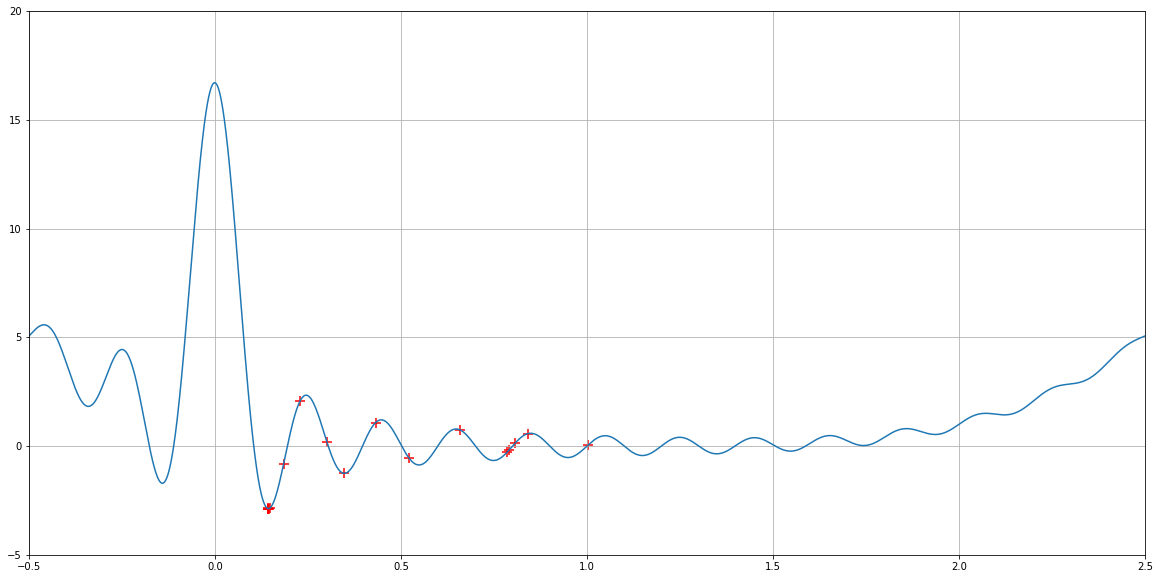

In [185]:
# Learning parameters
nb_pop = 50
prop_chosen = 0.25
nb_epochs = 100000

# Initialization
x0 = np.random.uniform(-10, 10)
mu0, sig0 = x0, 1
x_list = []
x_list.append(mu0)

# Evolution strategy
start = time.time()
for i in range(nb_epochs):
    # Generate population
    gen0 = np.random.randn(nb_pop)*np.sqrt(sig0) + mu0
    
    # Evaluate population
    fitness_scores = f(gen0)
    
    # Get best individuals
    res = sorted(zip(fitness_scores, gen0))
    nb_survivor = int(prop_chosen * len(gen0))
    res = res[:nb_survivor]
    res = np.array(res)
    x0_best = res[:, 1]
    
    # Update mean and variance of the next generation
    tmp = mu0
    mu0 = np.mean(x0_best)
    sig0 = np.sum((x0_best - tmp)**2) / nb_survivor
    x_list.append(mu0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print('Final value :', mu0, f(mu0))

# Display result
x_list = np.array(x_list)
precision = 100000
x_axis = np.linspace(-10, 10, precision).reshape((precision, 1))
y_axis = f(x_axis)
plt.figure(figsize=(20, 10))
plt.xlim(-0.5, 2.5)
plt.ylim(-5, 20)
plt.grid()
plt.plot(x_axis, y_axis)
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
plt.show()

# Bibliographie

Gradient Descent theory : ml.pdf  
Evolution Strategies introduction :  
http://blog.otoro.net/2017/10/29/visual-evolution-strategies/  
https://arxiv.org/pdf/1604.00772.pdf  
http://www.cmap.polytechnique.fr/~nikolaus.hansen/gecco2012-CMA-ES-tutorial.pdf  